# Social Media Analytics

Pada code ini akan dilakukan social media analytics dengan memanfaatkan data twitter.

### Import Libraries

In [57]:
# import libraries

import pandas as pd
import numpy as np

#import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


## A. Data Preparation

### Load Data

In [2]:
#import dataset 
df = pd.read_csv('tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


### Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 15 columns):
tweet_id                        14485 non-null int64
airline_sentiment               14485 non-null object
airline_sentiment_confidence    14485 non-null float64
negativereason                  9082 non-null object
negativereason_confidence       10416 non-null float64
airline                         14485 non-null object
airline_sentiment_gold          40 non-null object
name                            14485 non-null object
negativereason_gold             32 non-null object
retweet_count                   14485 non-null int64
text                            14485 non-null object
tweet_coord                     1007 non-null object
tweet_created                   14485 non-null object
tweet_location                  9798 non-null object
user_timezone                   9710 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


Dataset terdiri ada 15 features dengan 11 fetaures kategorik dan 4 features numerik.

### Data Dimension

In [4]:
df.shape

(14485, 15)

Dataset terdiri atas 14.485 tupple. Dimana setiap Tupple memiliki 15 features.

### Drop Duplicate Tweet

In [106]:
#drop duplicate tweet 
g_unique = set()
for item in df['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    dataframe = pd.DataFrame(tweet, columns = ['text'])

dataframe.head()

,text
0,@AmericanAir no space in my seat but thanks to...
1,@SouthwestAir today you sporadically changed m...
2,@AmericanAir @Delta @JetBlue I am going to be ...
3,@SouthwestAir Me on one of your planes!!! Than...
4,@AmericanAir one of my luggage didn't made it ...


In [107]:
dataframe.shape

(14427, 1)

Dari drop duplicate tweet di atas diketahui bahwa terdapat 58 duplicate tweet. 

## B. Data Preprocessing

### Basic Text Pre-processing

### 1. Lower Casing

lower casing : mengubah seluruh huruf pada feature text menjadi huruf kecil

In [108]:
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe['text'].head()

0    @americanair no space in my seat but thanks to...
1    @southwestair today you sporadically changed m...
2    @americanair @delta @jetblue i am going to be ...
3    @southwestair me on one of your planes!!! than...
4    @americanair one of my luggage didn't made it ...
Name: text, dtype: object

### 2. Punctuation removal

punctuation removal : menghapuskan tanda baca pada feature text

In [109]:
# pat1 = r'@[A-Za-z0-9_]+'
# pat2 = r'https?://[^ ]+'
# combined_pat = r'|'.join((pat1, pat2))
# dataframe['text'] = dataframe['text'].str.replace(combined_pat,'')
dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
dataframe.head()

,text
0,americanair no space in my seat but thanks to ...
1,southwestair today you sporadically changed my...
2,americanair delta jetblue i am going to be stu...
3,southwestair me on one of your planes thanks f...
4,americanair one of my luggage didnt made it on...


### 3. Stopwords Removal

In [110]:
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['text'].head(10)

0    americanair space seat thanks pilots im back 2...
1    southwestair today sporadically changed flight...
2    americanair delta jetblue going stuck florida ...
3    southwestair one planes thanks taking arizona ...
4    americanair one luggage didnt made onto flight...
5    usairways maybe prepurchase meal email flight ...
6    usairways option use twitter people working u ...
7    americanair second sat tarmac 3 hrs told would...
8     united boarding process sucks learn southwestair
9    united bag im mexico go build house amp suitca...
Name: text, dtype: object

### 4. Frequent Words Removal

Frequent Words Removal : menghapuskan top x dari kata yang paling sering muncul pada feature text

In [111]:
freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()[:10]
freq

united          4125
flight          3823
usairways       3036
americanair     2791
southwestair    2440
jetblue         2349
get             1326
cancelled       1034
thanks          1030
service          948
dtype: int64

In [112]:
freq = list(freq.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    space seat pilots im back 25mn early ohare did...
1    today sporadically changed departure 5 times a...
2    delta going stuck florida 3 days spiritairline...
3      one planes taking arizona 184 httptcofinq5fh6ue
4    one luggage didnt made onto hope really gets t...
Name: text, dtype: object

### 5. Rare Words Removal

Rare words removal : menghapuskan bottom x dari kata yang sangat jarang muncul pada feature text

In [113]:
rare_word = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-10:]
rare_word

wilmington               1
addr                     1
277                      1
poker                    1
stocking                 1
ceases                   1
monetary                 1
httptco6asuwx3kv0        1
lastflightwithyouever    1
ua5029                   1
dtype: int64

In [114]:
rare_word = list(rare_word.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    space seat pilots im back 25mn early ohare did...
1    today sporadically changed departure 5 times a...
2    delta going stuck florida 3 days spiritairline...
3      one planes taking arizona 184 httptcofinq5fh6ue
4    one luggage didnt made onto hope really gets t...
Name: text, dtype: object

### 6. Spelling Correction

Spelling Correction : membenarkan spelling kata yang ada pada feature text. Pada umumnya ketika orang mengetik akan terdapat typo.

In [115]:
dataframe['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    space seat pilots in back damn early share did...
1    today sporadically changed departure 5 times a...
2    felt going stuck florida 3 days spiritairlines...
3      one planes taking arizona 184 httptcofinq5fh6ue
4    one luggage didn made onto hope really gets to...
Name: text, dtype: object

### 7. Tokenization

Tokenization: memisahkan kalimat menjadi kata demi kata

In [116]:
TextBlob(dataframe['text'][1]).words

WordList(['today', 'sporadically', 'changed', 'departure', '5', 'times', 'amp', 'left', 'two', 'hours', 'late', 'uncharacteristic', 'u', 'httptcotxhyj40llg'])

### 8. Stemming

Stemming : memotong kata yang memiliki makna secara umum sama. Dalam code ini digunakan fungsi PorterStemmer.

In [117]:
st = PorterStemmer()
dataframe['text'] = dataframe['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
dataframe['text'].head()

0    space seat pilot im back 25mn earli ohar didnt...
1    today sporad chang departur 5 time amp left tw...
2    delta go stuck florida 3 day spiritairlin woul...
3          one plane take arizona 184 httptcofinq5fh6u
4    one luggag didnt made onto hope realli get tom...
Name: text, dtype: object

### 9. Lematization

Lematization : memotong kata kata yang berimbuhan menjadi kata dasarnya.

In [118]:
from textblob import Word
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['text'].head()

0    space seat pilot im back 25mn earli ohar didnt...
1    today sporad chang departur 5 time amp left tw...
2    delta go stuck florida 3 day spiritairlin woul...
3          one plane take arizona 184 httptcofinq5fh6u
4    one luggag didnt made onto hope realli get tom...
Name: text, dtype: object

## C. Data Exploration

### Basic Features Extraction

### 1. Number of Words

In [119]:
dataframe['word_count'] = dataframe['text'].apply(lambda x: len(str(x).split(" ")))
dataframe.head()

,text,word_count
0,space seat pilot im back 25mn earli ohar didnt...,13
1,today sporad chang departur 5 time amp left tw...,14
2,delta go stuck florida 3 day spiritairlin woul...,11
3,one plane take arizona 184 httptcofinq5fh6u,6
4,one luggag didnt made onto hope realli get tom...,10


### 2. Number of Characters

In [120]:
dataframe['char_count'] = dataframe['text'].str.len()
dataframe.head()

,text,word_count,char_count
0,space seat pilot im back 25mn earli ohar didnt...,13,73
1,today sporad chang departur 5 time amp left tw...,14,92
2,delta go stuck florida 3 day spiritairlin woul...,11,66
3,one plane take arizona 184 httptcofinq5fh6u,6,43
4,one luggag didnt made onto hope realli get tom...,10,56


### 3. Number of Stopwords

In [121]:
stop = stopwords.words('english')
dataframe['stopwords'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataframe.head()

,text,word_count,char_count,stopwords
0,space seat pilot im back 25mn earli ohar didnt...,13,73,0
1,today sporad chang departur 5 time amp left tw...,14,92,0
2,delta go stuck florida 3 day spiritairlin woul...,11,66,0
3,one plane take arizona 184 httptcofinq5fh6u,6,43,0
4,one luggag didnt made onto hope realli get tom...,10,56,0


### 4. Number of Special Characters

In [122]:
dataframe['hastags'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dataframe.head()

,text,word_count,char_count,stopwords,hastags
0,space seat pilot im back 25mn earli ohar didnt...,13,73,0,0
1,today sporad chang departur 5 time amp left tw...,14,92,0,0
2,delta go stuck florida 3 day spiritairlin woul...,11,66,0,0
3,one plane take arizona 184 httptcofinq5fh6u,6,43,0,0
4,one luggag didnt made onto hope realli get tom...,10,56,0,0


In [123]:
dataframe.head()

,text,word_count,char_count,stopwords,hastags
0,space seat pilot im back 25mn earli ohar didnt...,13,73,0,0
1,today sporad chang departur 5 time amp left tw...,14,92,0,0
2,delta go stuck florida 3 day spiritairlin woul...,11,66,0,0
3,one plane take arizona 184 httptcofinq5fh6u,6,43,0,0
4,one luggag didnt made onto hope realli get tom...,10,56,0,0


In [124]:
dataframe.shape

(14427, 5)

## Labelling Using Polarity (Textblob)

### 1. New Dataframe

In [125]:
#new df after removed duplicate text
new_df = dataframe
new_df.head()

#sentiment labeling 
text = new_df.text

In [126]:
new_df.head(10)

,text,word_count,char_count,stopwords,hastags
0,space seat pilot im back 25mn earli ohar didnt...,13,73,0,0
1,today sporad chang departur 5 time amp left tw...,14,92,0,0
2,delta go stuck florida 3 day spiritairlin woul...,11,66,0,0
3,one plane take arizona 184 httptcofinq5fh6u,6,43,0,0
4,one luggag didnt made onto hope realli get tom...,10,56,0,0
5,mayb prepurchas meal email 9 min short 3 hour ...,12,62,0,0
6,option use twitter peopl work u clue tell go a...,11,51,0,0
7,second sat tarmac 3 hr told would 30 min,9,40,0,0
8,board process suck learn,4,24,0,0
9,bag im mexico go build hous amp suitcas never ...,14,70,0,0


### 2. Labelling

In [127]:
#looping 
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    new_df.set_value(i,'sentiment', sentiment)
    if sentiment < 0.00 :
        sentimentclass = 'Negative'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    elif sentiment > 0.00 :
        sentimentclass = 'Positive'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    else :
        sentimentclass = ' Netral'
        new_df.set_value(i, 'sentimentclass', sentimentclass)

C:\Users\tararo064184\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\tararo064184\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\tararo064184\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\tararo064184\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [128]:
new_df = new_df[['text','sentiment','sentimentclass']]
new_df.head()

,text,sentiment,sentimentclass
0,space seat pilot im back 25mn earli ohar didnt...,0.00,Netral
1,today sporad chang departur 5 time amp left tw...,-0.15,Negative
2,delta go stuck florida 3 day spiritairlin woul...,0.00,Netral
3,one plane take arizona 184 httptcofinq5fh6u,0.00,Netral
4,one luggag didnt made onto hope realli get tom...,0.00,Netral


### 3. Aggregation Sentimentclass

In [129]:
#count sentiment 
sentiment = new_df.groupby(['sentimentclass'])['sentimentclass'].count()

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['sentimentclass']
chart.drop(['sentimentclass'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart.round(2)

,sentimentclass,tweet_count,percent
0,Netral,8349,0.58
1,Negative,2527,0.18
2,Positive,3551,0.25


**Sentiment Class dari data Tweet** <br>
Pada dataset twitter dicari kelas sentimentnya terhadap perusahaan maskapai. Dari data tersebut di dapat 3 kelas sentiment yaitu netral, positif, dan negatif. Masing-masing kelas tersebut memiliki proporsi, dimana netral sebanyak 0.58, negatif sebanyak 0.18, dan positif sebanyak 0.25.

<br>
Dari proporsi tersebut dapat diambil kesimpulan bahwa pengguna twitter yang menggunakan perusahaan maskapai mayoritas tidak reaktif terhadap jasa atau servis yang diberikan oleh maskapai penerbangan. Mayoritas dari mereka tidak menunjukkan apakah service yang diberikan sangat bagus atau sangat buruk. Mereka menilai bahwa servis yang diberikan biasa saja (tidak sangat bagus atau sangat buruk).

## D. Visualization

### 1. Barchat

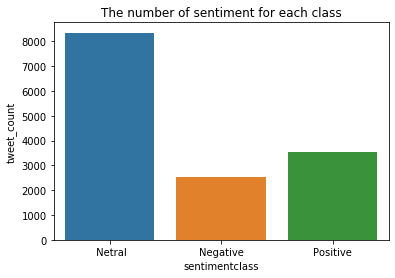

In [130]:
#make a barchar
ax = sns.barplot(x= 'sentimentclass', y='tweet_count', data=chart)
ax = ax.set_title('The number of sentiment for each class') 

### 2. Piechart

(-1.1204180281051472,
 1.3154900247991792,
 -1.111574225158089,
 1.3309960583756075)

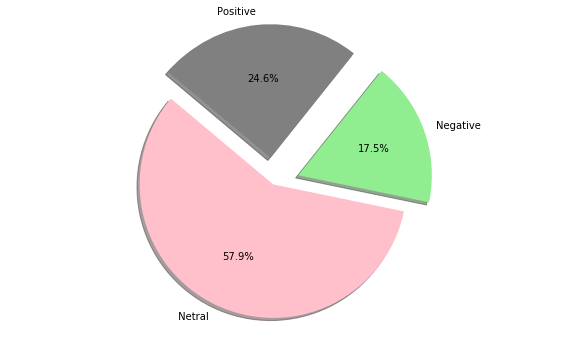

In [131]:
colors = [ 'pink','lightgreen','grey']
explode = (0, 0.2, 0.2)  # explode 1st slice
# Plot
figure = plt.figure(figsize= (10,6))
plt.pie(chart['tweet_count'], explode=explode, labels=chart['sentimentclass'], colors= colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

### 3. Wordcloud

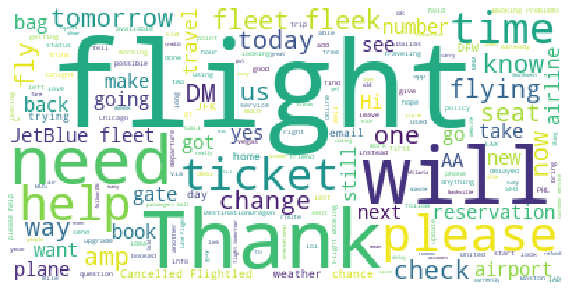

In [141]:
neutral=df[df['airline_sentiment']=='neutral']
words = ' '.join(neutral['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white'
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Dari sentiment class netral, kata yang paling banyak muncul pada keseluruhan tweet yang diberikan adalag flight, thank, need, ticket, please, will, help, dan time.

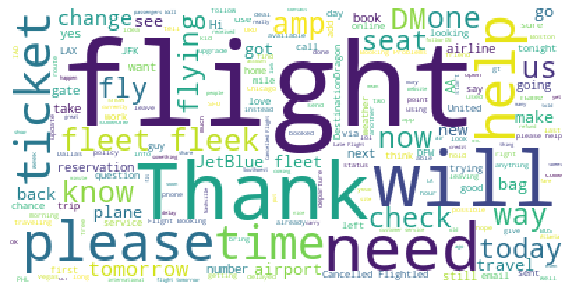

In [142]:
positive=df[df['airline_sentiment']=='positive']
words = ' '.join(neutral['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white'
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Dari sentiment class positif, kata yang paling banyak muncul pada keseluruhan tweet yang diberikan adalag flight, ticket, thank, will, need, help, please, dan time.

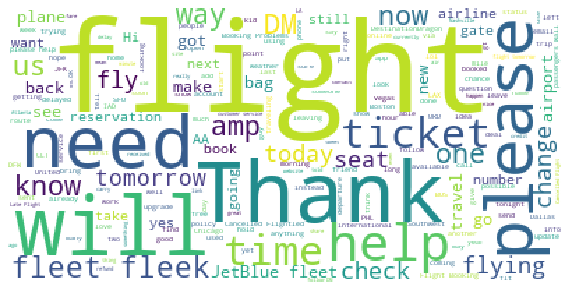

In [143]:
negative=df[df['airline_sentiment']=='negative']
words = ' '.join(neutral['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white'
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Dari sentiment class negatif, kata yang paling banyak muncul pada keseluruhan tweet yang diberikan adalag flight, need, thank, will, help, time, ticket, please, fleet, dan fleek.

Secara umum kata-kata yang muncul pada ketiga sentiment tersebut mirip.